## Mercari Price Suggestion Challenge

In [ ]:
!wget --header="Host: doc-08-0c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_oedmfi9oiptm6f861ocad02snk8tgp22_nonce=mu921iesg6468" --header="Connection: keep-alive" "https://doc-08-0c-docs.googleusercontent.com/docs/securesc/haoj875mfgd22v8g0abj49oidt0vbf6u/oaa4sco7v7dcd846g192d73sqefee5ir/1600183125000/06559701009217455969/06559701009217455969/1IzZW5Ix_i0h4CqPlV7PxtQIFFVUb7Tdp?e=download&authuser=0&nonce=mu921iesg6468&user=06559701009217455969&hash=rea40nuh86tl0tth91do8qucefd0bej5" -c -O 'mercari-price-suggestion-challenge.zip'

--2020-09-15 15:19:37--  https://doc-08-0c-docs.googleusercontent.com/docs/securesc/haoj875mfgd22v8g0abj49oidt0vbf6u/oaa4sco7v7dcd846g192d73sqefee5ir/1600183125000/06559701009217455969/06559701009217455969/1IzZW5Ix_i0h4CqPlV7PxtQIFFVUb7Tdp?e=download&authuser=0&nonce=mu921iesg6468&user=06559701009217455969&hash=rea40nuh86tl0tth91do8qucefd0bej5
Resolving doc-08-0c-docs.googleusercontent.com (doc-08-0c-docs.googleusercontent.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to doc-08-0c-docs.googleusercontent.com (doc-08-0c-docs.googleusercontent.com)|74.125.143.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘mercari-price-suggestion-challenge.zip’

mercari-price-sugge     [           <=>      ] 403.16M  62.0MB/s    in 6.5s    

2020-09-15 15:19:44 (62.0 MB/s) - ‘mercari-price-suggestion-challenge.zip’ saved [422739618]



In [ ]:
#unzipping data inside colab local
!unzip mercari-price-suggestion-challenge.zip -d /content

Archive:  mercari-price-suggestion-challenge.zip
  inflating: /content/sample_submission.csv.7z  
  inflating: /content/sample_submission_stg2.csv.zip  
  inflating: /content/test.tsv.7z    
  inflating: /content/test_stg2.tsv.zip  
  inflating: /content/train.tsv.7z   


In [ ]:

!apt-get install p7zip-full
!p7zip -d train.tsv.7z
!p7zip -d test.tsv.7z


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 77912192 bytes (75 MiB)

Extracting archive: train.tsv.7z
--
Path = train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      3% - train.tsv                  8% - train.tsv                 13% - train.tsv                 18% - train.tsv                 22% - train.tsv                

In [ ]:
!unzip /content/test_stg2.tsv.zip -d /content

Archive:  /content/test_stg2.tsv.zip
  inflating: /content/test_stg2.tsv  


In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 66kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
import scipy
import pickle
from sklearn.linear_model import Ridge , SGDRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
#from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("train.tsv",sep = '\t')
test1 = pd.read_csv("test_stg2.tsv",sep = '\t')
y = data['price']

In [ ]:
data.shape

(1482535, 8)

In [ ]:
train, test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [ ]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

category_name         5083
brand_name          506058
item_description         3
dtype: int64

In [ ]:
print(train.shape)
print(train.dtypes)

(1186028, 8)
train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object


In [ ]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## Exploratory Data Analysis

 **Price**

In [ ]:
data.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

The maximum value for price is 2009 and the mean value is 26.7. 50th and 25th percentile values is a far lesser than the mean value. 75th percentile value is much smaller than the max value. 
Now i will go for plotting histograms

**Objective** : To know the the number of occurance of datapoints by plotting the histogram representation

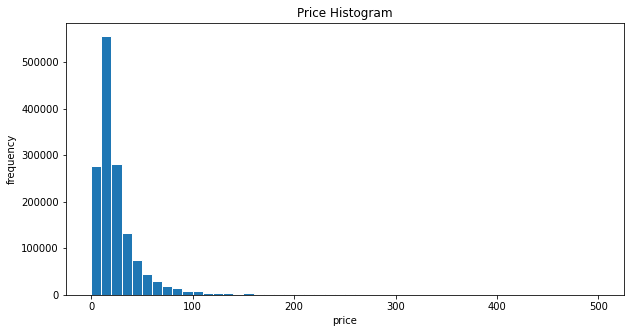

In [ ]:
data['price'].plot.hist(bins = 50, figsize = (10,5), edgecolor = 'white', range = [0,500])
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price Histogram')
plt.show()

**Analysis** :The price variable is very left skewed and ver long right trail. The minimum price is 0 ie free product and the highest is 2009.For larger price values this representation is not explainable . So iam going to plot histograms for log of prices to get rid of skeweness.


if price is 0 log(0) is undefined. So add 1 with price values and log(1) will be 0.



In [ ]:
data['logprice'] = np.log(data['price']+1) 

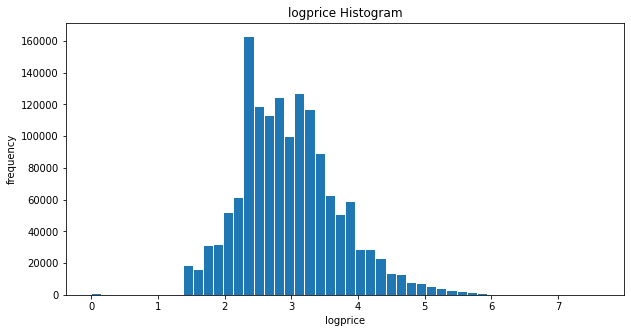

In [ ]:
data['logprice'].plot.hist(bins = 50, figsize = (10,5), edgecolor = 'white')
plt.xlabel('logprice')
plt.ylabel('frequency')
plt.title('logprice Histogram')
plt.show()

**Conclusion** : This histogram representation in not much explainable so it is better to go for plotting histograms based on percentile values.

In [ ]:
#https://stackoverflow.com/questions/56148987/plot-a-histogram-based-on-percentiles
data['Quantile'] = pd.qcut(data.price, q=np.arange(0,1.1,0.1)) #Quantile-based discretization function.
df = pd.DataFrame(data.groupby('Quantile').agg('size').reset_index())
df.columns = ['quantiles','count']
sns.set(rc={'figure.figsize':(15,6)}, style = 'whitegrid')
sns.barplot(x="quantiles", y="count", data= df,palette="Blues_d")
plt.title('Histogram by Price Percentiles')
plt.show()

**Conclusion** : The maximum frequency of data items occurs between 7 and 10 of price values and all the quantiles have a minimum count of 12000

**Shipping**

**Objective** : To know the variation of logprice across the shipping values

Shippig have two value, 0 and 1. 0 is for shipping price is paid by buyer and 1 is for shipping price is paid by seller.So inorder to understand the variation of log price with shipping value it is better to go for plotting barplots for both seller paid and buyer paid.

In [ ]:
sns.boxplot(x=data.shipping, y=data.logprice)

**Analysis** : When shipping is 1 , the shipping price is paid by seller and when shipping is 0 , the shipping price is paid by the buyer. The graph shows that for higher item price,the shipping charge is paid by the buyer and which is not as the usual trend..

**Conclusion** : From the plot it is understable that the plot doesnt produce a usual logic. So iam assuming that the shipping price is dependent on a particular brand or a particular category of items 

**Objective** : To know the log price variation by plotting violin plot


In [ ]:
sns.violinplot(x=data.shipping, y=data.logprice)

**Conclusion** : The conclusion is same as barplot. The mean price for shipping = 0 is highest than shipping = 1

**Category**

In [ ]:
data['category_name'].value_counts()

It is seen that category occurs in a hierarchical manner and the largest number of items occur for Women/Athletic Apparel/Pants, Tights, Leggings  category. In order to visuallize iam creating different columns for different subcatogory

In [ ]:
data[['Main_cateogry','subcategory1','subcategory2','subcategory3','subcategory4']] = data['category_name'].str.split('/', 0, expand=True)

Now it is better to plot boxplots for the top categories inorder to do a multivariate visulaization with respect to the price

**Objective** : To understand the variation of logprice across the main categories by plotting boxplots

In [ ]:
sns.set(rc={'figure.figsize':(20,9)})
sns.boxplot(x="Main_cateogry", y="logprice", data = data)
plt.title('Boxplot')
plt.show()

**Analysis** : From the plot it is understood that the maincategory men have the highest median priceand the rest of them have a similarity in median prices.


**Conclusion** : Men cateogry have the highest median price and it varies significantly so the category is going to be an important feature and to know the occurance it is better to go for Barplots

**Objective** : To know the number of occurance of datapoint by plotting Barplots

In [ ]:
df_cat1_counts = pd.DataFrame(data.groupby('Main_cateogry',as_index = False).agg({'shipping' : 'count'}))
df_cat1_counts.columns = ['cat1','count']
df_cat1_counts = df_cat1_counts.sort_values(by=['count'],ascending = False)
sns.set(rc={'figure.figsize':(8,6)}, style = 'whitegrid')
sns.barplot(x = "count", y="cat1", data=df_cat1_counts,palette="Blues_d")

**Analysis** : Most of the items belongs to Women category and the frequency is huge enough. Rest of the categories doent make an impact like Women category

**Conclusion** : Women category have the highest number of products

**Objective** : To visualise text like features by plotting Worldcloud

In [ ]:
cat3 = " ".join(cat for cat in data.subcategory2.values.astype(str)) #Concatenating all the categories
cat2 = " ".join(cat for cat in data.subcategory1.values.astype(str))
cat1 = " ".join(cat for cat in data.Main_cateogry.values.astype(str))


In [ ]:
text_cat = cat1 + cat2 + cat3

In [ ]:
wordcloud = WordCloud(collocations=False).generate(text_cat)
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Category Name')
plt.show()

**Conclusion** : From the word cloud , it is clear that Women category is occuring a lot of times than any of the other sub categories. The plot shows a high occurence of beuty , blowse , makeup so it is a great evidence fo roccuranc eof wimen category the highest times.

In [ ]:
data['Main_cateogry'].value_counts()

Women have the highest number of items

**Brand**

In [ ]:
data['brand_name'].nunique()

There are 4809 brandnames

**Objective** :To know the number of occurance of a data item by plotting Barplot

In [ ]:
data.brand_name.value_counts()[:10].plot(kind = 'bar',figsize = (20,10), title="Top Brand Names",fontsize=20)

**Analysis** : The most number of occurance in PINK brand. Brand is a text column , so it is better to visualize through word cloud.

---



In [ ]:
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(data.brand_name.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Listing Names')
plt.show()

**Conclusion** : Pink, victoria , secret are the most occurred brands.There is nothing more that could be understood from this plot.

**Description**

The best way to visualize this column is by worcloud.This helps to see the word that occurs more frequently.

**Obective** : Worldcloud

In [ ]:
#Ref: https://www.kaggle.com/konohayui/mercari-price-suggestion-eda
wc = WordCloud(max_words=300,width = 1200, height = 900).generate(" ".join(data.item_description.astype(str)))
plt.figure(figsize = (18, 13))
plt.imshow(wc)
plt.axis("off")
plt.show()

**Conclusion** : Words BRAND , SHIPPING , NEW occurs more frequently and this accounts to price highly.

## **Feature Engineering**

**Category**

Splitting caregory in to sub categories for train and test

In [ ]:
test[['Main_category','subcategory1','subcategory2','subcategory3','subcategory4']] = test['category_name'].str.split('/', 0, expand=True)
train[['Main_category','subcategory1','subcategory2','subcategory3','subcategory4']] = train['category_name'].str.split('/', 0, expand=True)

In [ ]:
test1[['Main_category','subcategory1','subcategory2','subcategory3','subcategory4']] = test1['category_name'].str.split('/', 0, expand=True)

In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Main_category,subcategory1,subcategory2,subcategory3,subcategory4
1416089,1416089,LuLaRoe kids L/XL leggings,3,Kids/Boys (4+)/Bottoms,NaN,15.0,1,Worn once. Still in great condition,Kids,Boys (4+),Bottoms,None,None
1423955,1423955,Bundle 5 Display mannequins,1,Other/Other/Other,NaN,44.0,0,Brand new,Other,Other,Other,None,None
403867,403867,LIVING PROOF PERFECT HAIR DAY DRY SHAMPO,1,Beauty/Hair Care/Styling Products,NaN,35.0,0,This listing is for 3 full size bottles of liv...,Beauty,Hair Care,Styling Products,None,None
701974,701974,Palazzo pants,2,Women/Pants/Casual Pants,NaN,19.0,0,Like new adorable black and white palazzo pant...,Women,Pants,Casual Pants,None,None
1124330,1124330,RESERVED FOR Ms Jas PINK BOYSHORTS LARGE,1,Women/Underwear/Panties,PINK,30.0,1,NEW WITH TAGS MORNING SKY SHEER SEAFOAM OLIVE ...,Women,Underwear,Panties,None,None


**Name Length**

In [ ]:
len_tr = []
for i in train['name']:
  l = []
  l.append(len(str(i)))
  len_tr.append(l)

In [ ]:
df = pd.DataFrame(len_tr,columns=['name_length'])
train['name_length'] = df['name_length']

In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Main_category,subcategory1,subcategory2,subcategory3,subcategory4,preprocessed_names,preprocessed_desc,name_length
1416089,1416089,LuLaRoe kids L/XL leggings,3,Kids/Boys (4+)/Bottoms,missing,15.0,1,Worn once. Still in great condition,Kids,Boys (4+),Bottoms,missing,missing,lularoe kids l xl leggings,worn still great condition,NaN
1423955,1423955,Bundle 5 Display mannequins,1,Other/Other/Other,missing,44.0,0,Brand new,Other,Other,Other,missing,missing,bundle 5 display mannequins,brand new,NaN
403867,403867,LIVING PROOF PERFECT HAIR DAY DRY SHAMPO,1,Beauty/Hair Care/Styling Products,missing,35.0,0,This listing is for 3 full size bottles of liv...,Beauty,Hair Care,Styling Products,missing,missing,living proof perfect hair day dry shampo,this listing 3 full size bottles living proof ...,10.0
701974,701974,Palazzo pants,2,Women/Pants/Casual Pants,missing,19.0,0,Like new adorable black and white palazzo pant...,Women,Pants,Casual Pants,missing,missing,palazzo pants,like new adorable black white palazzo pants no...,33.0
1124330,1124330,RESERVED FOR Ms Jas PINK BOYSHORTS LARGE,1,Women/Underwear/Panties,PINK,30.0,1,NEW WITH TAGS MORNING SKY SHEER SEAFOAM OLIVE ...,Women,Underwear,Panties,missing,missing,reserved for ms jas pink boyshorts large,new with tags morning sky sheer seafoam olive ...,37.0


**Objective** : To plot scatter plot to understand the price variation.

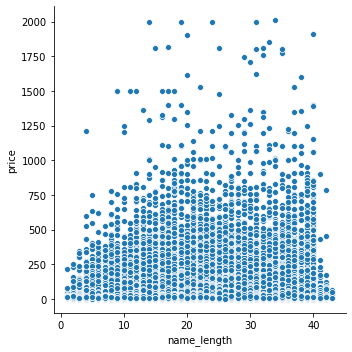

In [ ]:
sns.relplot(x="name_length", y="price", data=train);

**Conclusion** : From the plot it is understood that the name lemgth doenst have any relationship with the target variable . So ignoring the feature.

**Description Length**

In [ ]:
len_tr = []
for i in train['item_description']:
  l = []
  l.append(len(str(i)))
  len_tr.append(l)

In [ ]:
df = pd.DataFrame(len_tr,columns=['description_length'])
train['description_length'] = df['description_length']

In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,preprocessed_names,Main_category,subcategory1,subcategory2,subcategory3,subcategory4,name_length,description_length
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,,mlb cincinnati reds t shirt size xl,Men,Tops,T-shirts,None,None,35,1
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,razer blackwidow chroma keyboard,Electronics,Computers & Tablets,Components & Parts,None,None,32,188
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,ava viv blouse,Women,Tops & Blouses,Blouse,None,None,14,124
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,leather horse statues,Home,Home Décor,Home Décor Accents,None,None,21,173
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing,44.0,0,Complete with certificate of authenticity,24k gold plated rose,Women,Jewelry,Necklaces,None,None,20,41


**Objective** : To plot scatter plot to understand the price variation

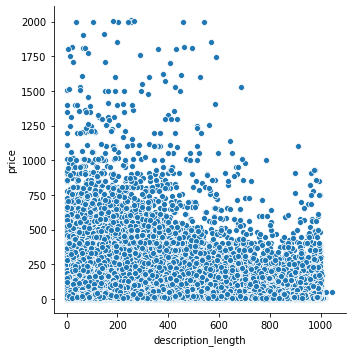

In [ ]:
sns.relplot(x="description_length", y="price", data=train);

**Conclusion** : From the scatter plot it is understandable that when price decreases description length increases. This is found to be a better feature. So iam adding it in the test data as well.

In [ ]:
len_tr = []
for i in test['item_description']:
  l = []
  l.append(len(str(i)))
  len_tr.append(l)

In [ ]:
df1 = pd.DataFrame(len_tr,columns=['description_length'])
test['description_length'] = df1['description_length']

In [ ]:
len_tr = []
for i in test1['item_description']:
  l = []
  l.append(len(str(i)))
  len_tr.append(l)

In [ ]:
df2 = pd.DataFrame(len_tr,columns=['description_length'])
test1['description_length'] = df2['description_length']

**Mean Price For Each Brand**

In [ ]:
train['Mean_Brand_Price'] = train.groupby('brand_name')['price'].transform('mean')

In [ ]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


**Objective** : To understand the variation of price with the mean prices b plotting scatter plots.

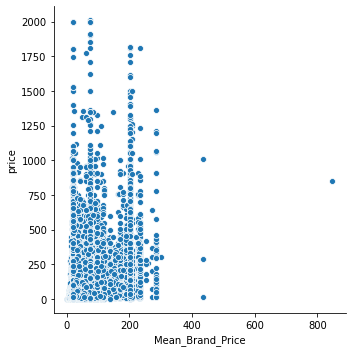

In [ ]:
sns.relplot(x="Mean_Brand_Price", y="price", data=train);

**Conclusion** : There is a small realtionship between both variables so im taking it as a new feature and adding it in test data as well.

Inorder to add mean brand price in test data , we need to map the already calculated mean price from train data so iam creating a custom function

In [ ]:
def func(source,target):
  dict = pd.Series(train[target].values, index=train[source].values).to_dict()
  return test[source].map(dict)

In [ ]:
test['Mean_Brand_Price'] = func('brand_name', 'Mean_Brand_Price')

In [ ]:
def func1(source,target):
  dict = pd.Series(train[target].values, index=train[source].values).to_dict()
  return test1[source].map(dict)

In [ ]:
test1['Mean_Brand_Price'] = func1('brand_name', 'Mean_Brand_Price')

In [ ]:
test.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Main_category,subcategory1,subcategory2,subcategory3,subcategory4,preprocessed_names,preprocessed_desc,description_length,Mean_Brand_Price
777341,777341,F/ship 4 Totoro Washi + 1 pen,1,Handmade/Paper Goods/Stationery,missing,12.0,1,This listing is for all 4 Totoro washi tape fo...,Handmade,Paper Goods,Stationery,missing,missing,f ship 4 totoro washi 1 pen,this listing 4 totoro washi tape limited time ...,NaN,21.111848
1463629,1463629,UCLA Men's Bundle + Shorts,1,Women/Other/Other,Adidas,76.0,1,7 items. 1: XL. 2: 2XL. 3:2XL. 4: XL. 5: 2XL. ...,Women,Other,Other,missing,missing,ucla men bundle shorts,7 items 1 xl 2 2xl 3 2xl 4 xl 5 2xl 6 os 7 38,NaN,42.918065
350669,350669,Listing for lol,1,Beauty/Makeup/Lips,missing,12.0,1,- sunglasses and necklace :),Beauty,Makeup,Lips,missing,missing,listing lol,sunglasses necklace,NaN,21.111848
310222,310222,25 pcs kawaii sticker flakes,1,Kids/Toys/Arts & Crafts,missing,3.0,1,I ordered a bunch of stickers so you will reci...,Kids,Toys,Arts & Crafts,missing,missing,25 pcs kawaii sticker flakes,i ordered bunch stickers recieve many cute ones,NaN,21.111848
759257,759257,Chanel Mini Lipgloss Set,2,Beauty/Makeup/Lips,Chanel,30.0,1,Brand new never used authentic Mini Lipgloss g...,Beauty,Makeup,Lips,missing,missing,chanel mini lipgloss set,brand new never used authentic mini lipgloss g...,NaN,73.884937


**Mean Price For Main Category**

In [ ]:
train['Mean_Main_Price'] = data.groupby('Main_category')['price'].transform('mean')

**Objective** : To understand the price variation by plotting scatter plots

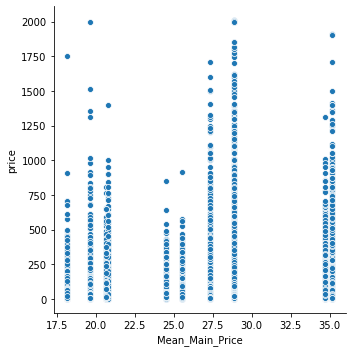

In [ ]:
sns.relplot(x="Mean_Main_Price", y="price", data=train);

**Conclusion** : This doesn't have a linear relationship with price. So iam rejecting the feature

**Mean Price For Subcategory2**

In [ ]:
train['Mean_Sub_Price'] = train.groupby('subcategory2')['price'].transform('mean')

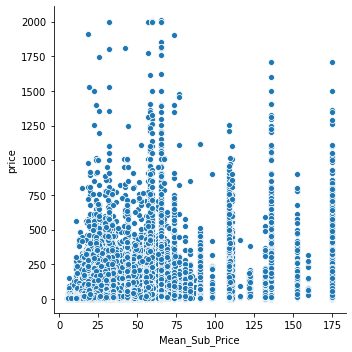

In [ ]:
sns.relplot(x="Mean_Sub_Price", y="price", data=train);

**Conclusion** : It seems that there is a relationship so iam including this feature and adding in test data as well.

In [ ]:
test['Mean_Sub_Price'] = func('subcategory2', 'Mean_Sub_Price')

In [ ]:
test1['Mean_Sub_Price'] = func1('subcategory2', 'Mean_Sub_Price')

**Mean Price For Subcategory1**

In [ ]:
train['Mean_Sub1_Price'] = data.groupby('subcategory1')['price'].transform('mean')

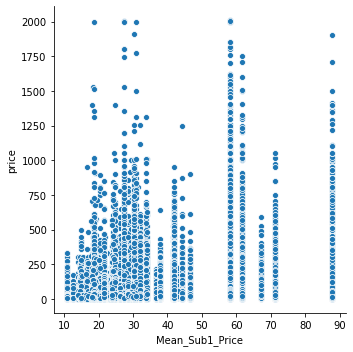

In [ ]:
sns.relplot(x="Mean_Sub1_Price", y="price", data=train);

**Conclusion** : This doesn't have a fair variation across price so rejecting the feature

**Median Price For Brand**

In [ ]:
train['Median_Brand_Price'] = train.groupby('brand_name')['price'].transform('median')

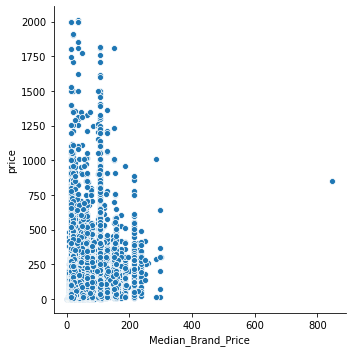

In [ ]:
sns.relplot(x="Median_Brand_Price", y="price", data=train);

**Conclusion** : It seems that there is a good relationship so im including the feature and adding it in test data as well.

In [ ]:
test['Median_Brand_Price'] = func('brand_name', 'Median_Brand_Price')

In [ ]:
test1['Median_Brand_Price'] = func1('brand_name', 'Median_Brand_Price')

# **Data Preprocessing And Encoding**

**Preprocessing and encoding text attributes**

The preprocessing includes removing stopwords , removing special words, word decontraction etc
Encoding text features is done through countvectorizer(BOW).
Encoding brand name is by label binarizer which transforms multiclass features in to labels. Encoding item_condition_id and shipping is done through one hot encoder

In [ ]:
#appliedaicourse.com
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

def text_preprocess(data):
    preprocessed = []
    for sentance in tqdm(data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed.append(sent.lower().strip())
    return preprocessed   

In [ ]:
train['name'] = train['name'].replace([np.nan], ' ')
test['name'] = test['name'].replace([np.nan], ' ')

In [ ]:
test1['name'] = test1['name'].replace([np.nan], ' ')

In [ ]:
from tqdm import tqdm
import re
train['preprocessed_names'] = text_preprocess(train['name'])
test['preprocessed_names'] = text_preprocess(test['name'])


100%|██████████| 1186028/1186028 [00:28<00:00, 41693.70it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 296507/296507 [00:07<00:00, 41570.61it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test1['preprocessed_names'] = text_preprocess(test1['name'])

100%|██████████| 3460725/3460725 [01:21<00:00, 42337.82it/s]


In [ ]:
train['item_description'] = train['item_description'].replace([np.nan,'No description yet'], ' ')
test['item_description'] = test['item_description'].replace([np.nan,'No description yet'], ' ')

In [ ]:
test1['item_description'] = test1['item_description'].replace([np.nan,'No description yet'], ' ')

In [ ]:
train['preprocessed_desc'] = text_preprocess(train['item_description'])
test['preprocessed_desc'] = text_preprocess(test['item_description'])
test1['preprocessed_desc'] = text_preprocess(test1['item_description'])

100%|██████████| 1186028/1186028 [01:26<00:00, 13735.73it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
100%|██████████| 296507/296507 [00:21<00:00, 13772.88it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 3460725/3460725 [04:08<00:00, 13926.15it/s]


In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Main_category,subcategory1,subcategory2,subcategory3,subcategory4,preprocessed_names,preprocessed_desc
1416089,1416089,LuLaRoe kids L/XL leggings,3,Kids/Boys (4+)/Bottoms,NaN,15.0,1,Worn once. Still in great condition,Kids,Boys (4+),Bottoms,None,None,lularoe kids l xl leggings,worn still great condition
1423955,1423955,Bundle 5 Display mannequins,1,Other/Other/Other,NaN,44.0,0,Brand new,Other,Other,Other,None,None,bundle 5 display mannequins,brand new
403867,403867,LIVING PROOF PERFECT HAIR DAY DRY SHAMPO,1,Beauty/Hair Care/Styling Products,NaN,35.0,0,This listing is for 3 full size bottles of liv...,Beauty,Hair Care,Styling Products,None,None,living proof perfect hair day dry shampo,this listing 3 full size bottles living proof ...
701974,701974,Palazzo pants,2,Women/Pants/Casual Pants,NaN,19.0,0,Like new adorable black and white palazzo pant...,Women,Pants,Casual Pants,None,None,palazzo pants,like new adorable black white palazzo pants no...
1124330,1124330,RESERVED FOR Ms Jas PINK BOYSHORTS LARGE,1,Women/Underwear/Panties,PINK,30.0,1,NEW WITH TAGS MORNING SKY SHEER SEAFOAM OLIVE ...,Women,Underwear,Panties,None,None,reserved for ms jas pink boyshorts large,new with tags morning sky sheer seafoam olive ...


In [ ]:
#BOW encoding of text data
def encoder_text(train,test,test1,params):
    vectorizer = CountVectorizer(ngram_range = params[0],       
                                 min_df = params[1], #removes words that appear more infrequently
                                 max_df = params[2], #removes words thath appear more infrequently 
                                 max_features = params[3]) #size of the vocab
    
    train_transform = vectorizer.fit_transform(train)
    test_transform = vectorizer.transform(test)
    test1_transform = vectorizer.transform(test1)
    feature_names = vectorizer.get_feature_names()
    return train_transform,test_transform,test1_transform,feature_names

In [ ]:
train_bow_name,test_bow_name,test1_bow_name,name_features = encoder_text(train['preprocessed_names'],test['preprocessed_names'],test1['preprocessed_names'],((1,4),25,1.0,50000))
train_bow_desc,test_bow_desc,test1_bow_desc,desc_features = encoder_text(train['preprocessed_desc'],test['preprocessed_desc'],test1['preprocessed_names'],((1,3),30,1.0,100000))

In [ ]:
print(train_bow_name.shape)
print(test_bow_desc.shape)

(1186028, 33891)
(296507, 100000)


In [ ]:
train["brand_name"] = train["brand_name"].fillna("missing").astype("category")
test["brand_name"] = test["brand_name"].fillna("missing").astype("category")

In [ ]:
test1["brand_name"] = test1["brand_name"].fillna("missing").astype("category")

In [ ]:
#encoding brandname by labelBinarizer
train["brand_name"] = train["brand_name"].fillna("missing").astype("category")
test["brand_name"] = test["brand_name"].fillna("missing").astype("category")
test1["brand_name"] = test1["brand_name"].fillna("missing").astype("category")
bin = LabelBinarizer(sparse_output=True)
train_transform = bin.fit_transform(train["brand_name"])
test_transform = bin.transform(test["brand_name"])
test1_transform = bin.transform(test1["brand_name"])
train_transform.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1186028, 4557)

In [ ]:
#encoding item_condiotn_id and shipping 
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data[['item_condition_id','shipping']])
train_ohe = enc.transform(train[['item_condition_id','shipping']])
test_ohe = enc.transform(test[['item_condition_id','shipping']])
test1_ohe = enc.transform(test1[['item_condition_id','shipping']])
train_ohe.shape

(1186028, 7)

In [ ]:
train["Main_category"] = train["Main_category"].fillna("missing").astype("category")
test["Main_category"] = test["Main_category"].fillna("missing").astype("category")

train["subcategory1"] = train["subcategory1"].fillna("missing").astype("category")
test["subcategory1"] = test["subcategory1"].fillna("missing").astype("category")

train["subcategory2"] = train["subcategory2"].fillna("missing").astype("category")
test["subcategory2"] = test["subcategory2"].fillna("missing").astype("category")

train["subcategory3"] = train["subcategory3"].fillna("missing").astype("category")
test["subcategory3"] = test["subcategory3"].fillna("missing").astype("category")

train["subcategory4"] = train["subcategory4"].fillna("missing").astype("category")
test["subcategory4"] = test["subcategory4"].fillna("missing").astype("category")


In [ ]:
test1["Main_category"] = test1["Main_category"].fillna("missing").astype("category")
test1["subcategory1"] = test1["subcategory1"].fillna("missing").astype("category")
test1["subcategory2"] = test1["subcategory2"].fillna("missing").astype("category")
test1["subcategory3"] = test1["subcategory3"].fillna("missing").astype("category")
test1["subcategory4"] = test1["subcategory4"].fillna("missing").astype("category")

In [ ]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

category_name    5083
dtype: int64

In [ ]:
#Encoding categories
unique_categories = train["Main_category"].unique()
count_category = CountVectorizer(vocabulary = unique_categories,lowercase = False,binary = True)
train_main = count_category.fit_transform(train["Main_category"])
test_main = count_category.transform(test["Main_category"])
test1_main = count_category.transform(test1["Main_category"])
unique_categories = train["subcategory1"].unique()
count_category = CountVectorizer(vocabulary = unique_categories,lowercase = False,binary = True)
train_sub1 = count_category.fit_transform(train["subcategory1"])
test_sub1 = count_category.transform(test["subcategory1"])
test1_sub1 = count_category.transform(test1["subcategory1"])
unique_categories = train["subcategory2"].unique()
count_category = CountVectorizer(vocabulary = unique_categories,lowercase = False,binary = True)
train_sub2 = count_category.fit_transform(train["subcategory2"])
test_sub2 = count_category.transform(test["subcategory2"])
test1_sub2 = count_category.transform(test1["subcategory2"])
unique_categories = train["subcategory3"].unique()
count_category = CountVectorizer(vocabulary = unique_categories,lowercase = False,binary = True)
train_sub3 = count_category.fit_transform(train["subcategory3"])
test_sub3 = count_category.transform(test["subcategory3"])
test1_sub3 = count_category.transform(test1["subcategory3"])
unique_categories = train["subcategory4"].unique()
count_category = CountVectorizer(vocabulary = unique_categories,lowercase = False,binary = True)
train_sub4 = count_category.fit_transform(train["subcategory4"])
test_sub4 = count_category.transform(test["subcategory4"])
test1_sub4 = count_category.transform(test1["subcategory4"])

In [ ]:
 mean_value=train['description_length'].mean()
train['description_length']=train['description_length'].fillna(mean_value)
mean_value=test['description_length'].mean()
test['description_length']=test['description_length'].fillna(mean_value)
mean_value=train['Mean_Brand_Price'].mean()
train['Mean_Brand_Price']=train['Mean_Brand_Price'].fillna(mean_value)
mean_value=train['Mean_Sub_Price'].mean()
train['Mean_Sub_Price']=train['Mean_Sub_Price'].fillna(mean_value)
mean_value=train['Median_Brand_Price'].mean()
train['Median_Brand_Price']=train['Median_Brand_Price'].fillna(mean_value)
mean_value=test['Mean_Brand_Price'].mean()
test['Mean_Brand_Price']=test['Mean_Brand_Price'].fillna(mean_value)
mean_value=test['Mean_Sub_Price'].mean()
test['Mean_Sub_Price']=test['Mean_Sub_Price'].fillna(mean_value)
mean_value=test['Median_Brand_Price'].mean()
test['Median_Brand_Price']=test['Median_Brand_Price'].fillna(mean_value)


In [ ]:
mean_value=test1['Mean_Brand_Price'].mean()
test1['Mean_Brand_Price']=test1['Mean_Brand_Price'].fillna(mean_value)
mean_value=test1['Mean_Sub_Price'].mean()
test1['Mean_Sub_Price']=test1['Mean_Sub_Price'].fillna(mean_value)
mean_value=test1['Median_Brand_Price'].mean()
test1['Median_Brand_Price']=test1['Median_Brand_Price'].fillna(mean_value)

In [ ]:
#Encoding new numerical features
descr_len_tra = np.array(train['description_length']).reshape(-1,1)
descr_len_tes = np.array(test['description_length']).reshape(-1,1)
desc_len_cnt = StandardScaler(copy=True)
train_desc_feats = desc_len_cnt.fit_transform(descr_len_tra)
test_desc_feats = desc_len_cnt.transform(descr_len_tes)


In [ ]:
test1_desc_feats = desc_len_cnt.transform(descr_len_tes1)
descr_len_tes1 = np.array(test1['description_length']).reshape(-1,1)

In [ ]:
mean_brand_tra = np.array(train['Mean_Brand_Price']).reshape(-1,1)
mean_brand_tes = np.array(test['Mean_Brand_Price']).reshape(-1,1)

mean_brand = StandardScaler(copy=True)
train_mean_brand = mean_brand.fit_transform(mean_brand_tra)
test_mean_brand = mean_brand.transform(mean_brand_tes)

In [ ]:
mean_brand_tes1 = np.array(test1['Mean_Brand_Price']).reshape(-1,1)
test1_mean_brand = mean_brand.transform(mean_brand_tes1)

In [ ]:
mean_cat_tra = np.array(train['Mean_Sub_Price']).reshape(-1,1)
mean_cat_tes = np.array(test['Mean_Sub_Price']).reshape(-1,1)

mean_cat = StandardScaler(copy=True)
train_mean_cat = mean_cat.fit_transform(mean_cat_tra)
test_mean_cat = mean_cat.transform(mean_cat_tes)

In [ ]:
mean_cat_tes1 = np.array(test1['Mean_Sub_Price']).reshape(-1,1)
test1_mean_cat = mean_cat.transform(mean_cat_tes1)

In [ ]:
median_brand_tra = np.array(train['Median_Brand_Price']).reshape(-1,1)
median_brand_tes = np.array(test['Median_Brand_Price']).reshape(-1,1)

median_brand = StandardScaler(copy=True)
train_median_brand = median_brand.fit_transform(median_brand_tra)
test_median_brand = median_brand.transform(median_brand_tes)

In [ ]:
median_brand_tes1 = np.array(test1['Median_Brand_Price']).reshape(-1,1)
test1_median_brand = median_brand.transform(median_brand_tes1)

In [ ]:
X_train = scipy.sparse.hstack((train_bow_name,train_bow_desc,train_transform,train_ohe,train_main,train_sub1,train_sub2,train_sub3,train_sub4,train_desc_feats,train_mean_brand,train_mean_cat,train_median_brand)).tocsr().astype('float32')
X_test = scipy.sparse.hstack((test_bow_name,test_bow_desc,test_transform,test_ohe,test_main,test_sub1,test_sub2,test_sub3,test_sub4,test_desc_feats,test_mean_brand,test_mean_cat,test_median_brand)).tocsr().astype('float32')

In [ ]:
X_test1 = scipy.sparse.hstack((test1_bow_name,test1_bow_desc,test1_transform,test1_ohe,test1_main,test1_sub1,test1_sub2,test1_sub3,test1_sub4,test1_desc_feats,test1_mean_brand,test1_mean_cat,test1_median_brand)).tocsr().astype('float32')

# **Data Modelling**

**Linear Regression**

The linear regression assumes that all the datapoints lie on a linear hyper plane. For producing a lower loss , the attributes must have some linear relationship between them. So im going to plot heat map to know the correlation.

In [ ]:
correlation = data.corr()

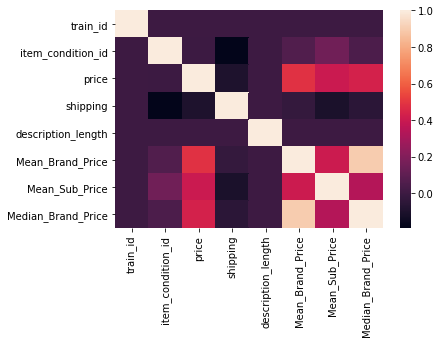

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

It seems that there is no good correlation between datapoints (lessthan 0.5). Therefore iam concluding that linearregression might not be a good model for the prediction task without regularization. Therefore iam going for Ridge regression.

 **SGD Regressor**

In [ ]:
y_train = np.log(train["price"]+1)
y_test = np.log(test["price"]+1)

In [ ]:
parameters = {"alpha":[0.0001,0.001,0.01,0.1,0,1,10,100,1000],
             "l1_ratio" : [0.2,0.3,0.4,0.5,0.6,0.7]
             }
model = SGDRegressor  (
                         loss='squared_loss',
                         learning_rate='invscaling',
                         max_iter=200,
                         penalty='l2',
                         fit_intercept=False
                      )
reg = GridSearchCV(model,param_grid =parameters,n_jobs=-1)
reg.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=False,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=200,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100,
                                   1000],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]},
             pre_dispatch='2*n_jobs', refit=True, 

In [ ]:
reg.best_params_

{'alpha': 0, 'l1_ratio': 0.2}

In [ ]:
model = SGDRegressor  (
                         loss='squared_loss',
                         learning_rate='invscaling',
                         max_iter=200,
                         penalty='l2',
                         alpha = 0,
                         l1_ratio = 0.2,
                         fit_intercept=False
                      )
model.fit(X_train, y_train)

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=False, l1_ratio=0.2,
             learning_rate='invscaling', loss='squared_loss', max_iter=200,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
scores = model.predict(X_test)
RMSLE = np.sqrt(mean_squared_error(y_test, scores))
print(RMSLE)

0.4783411342297504


In [ ]:
scores = model.predict(X_test1)

In [ ]:
scores.shape

(3460725,)

In [ ]:
pred = ['price']
for i in scores:
  pred.append(np.exp(i))

In [ ]:
index = ['test_id']
for i in range(3460725):
  index.append(i)

In [ ]:
rows = zip(index,pred)
import csv
with open('submission.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for row in rows:
      wr.writerow(row)

In [ ]:
from google.colab import files
files.download('submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Kaggel Score**

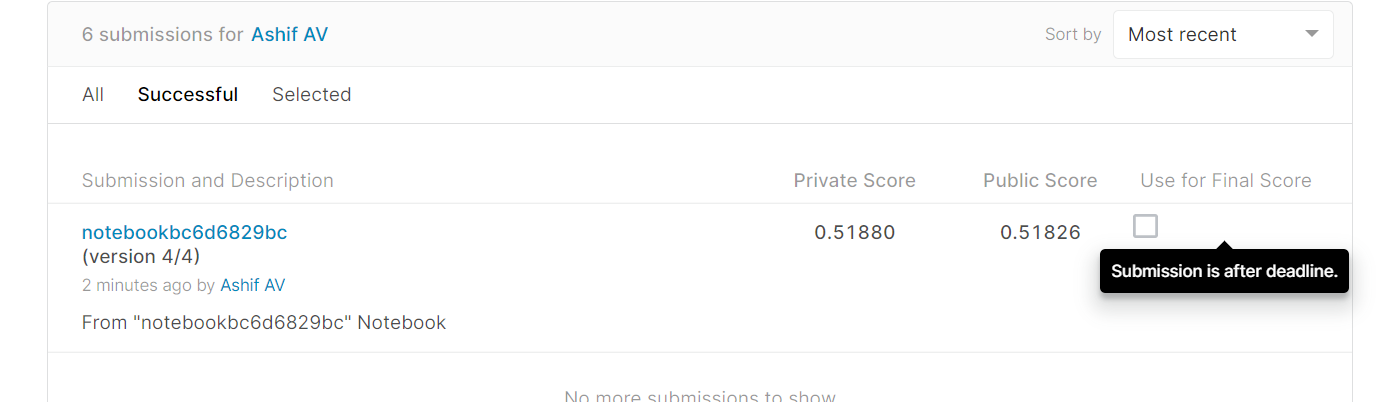

SGDRegressor is linear model and it produces an RMSLE score of 0.51 in kaggle

**CatBoost**

Catboost really works well with categorical features and its default parameters are just suffiecient for a better prediction so iam not going to do hyper parameter tuning on it

In [ ]:
list = []
n = [200,250,300,350]
for i in n:
  model = CatBoostRegressor(n_estimators = i)
  model.fit(X_train, y_train)
  scores = model.predict(X_test)
  RMSLE = np.sqrt(mean_squared_error(y_test, scores))
  list.append(RMSLE)

In [ ]:
list

[0.5292887896628707,
 0.5130362896799545,
 0.5035947244392676,
 0.49848375843321835]

In [ ]:
model = CatBoostRegressor(n_estimators = 350)
model.fit(X_train, y_train)
scores = model.predict(X_test)
RMSLE = np.sqrt(mean_squared_error(y_test, scores))

**Decision Tree**

In [ ]:
dtm = DecisionTreeRegressor()
param_grid = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100]
              }
grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)
grid_cv_dtm.fit(X_train,y_train)

In [ ]:
grid_cv_dtm.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 10}

In [ ]:
dtm = DecisionTreeRegressor(max_depth= 8, min_samples_leaf= 20, min_samples_split= 10)
dtm.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
scores = dtm.predict(X_test)
RMSLE = np.sqrt(mean_squared_error(y_test, scores))
print(RMSLE)

0.5739236969914285


In [ ]:
scores = dtm.predict(X_test1)
pred = ['price']
for i in scores:
  pred.append(np.exp(i))
index = ['test_id']
for i in range(3460725):
  index.append(i)
rows = zip(index,pred)
import csv
with open('submission.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for row in rows:
      wr.writerow(row)
from google.colab import files
files.download('submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('submission.csv')
df.shape

(3460725, 2)

Kaggle Score

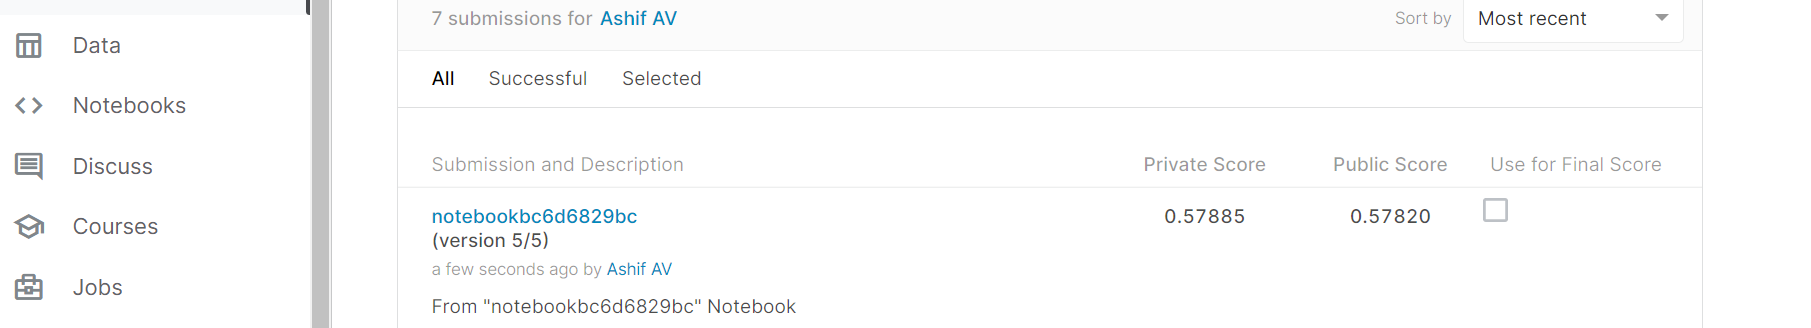

# **Deep Learning Models**

In [ ]:
import keras as ks
from keras.preprocessing.text import Tokenizer

In [ ]:
import pandas as pd
train = pd.read_csv("train.tsv",sep = '\t')
test = pd.read_csv("test_stg2.tsv",sep = '\t')

In [ ]:
raw_text = np.hstack([train.item_description.str.lower(), train.name.str.lower()])
vec = Tokenizer()
vec.fit_on_texts(raw_text)
train["seq_item_description"] = vec.texts_to_sequences(train.item_description.str.lower())
test["seq_item_description"] = vec.texts_to_sequences(test.item_description.str.lower())
train["seq_name"] = vec.texts_to_sequences(train.name.str.lower())
test["seq_name"] = vec.texts_to_sequences(test.name.str.lower())
train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Main_category,subcategory1,subcategory2,subcategory3,subcategory4,description_length,Mean_Brand_Price,Mean_Sub_Price,Median_Brand_Price,seq_item_description,seq_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,,Men,Tops,T-shirts,missing,missing,1,21.133453,18.352495,14.0,[],"[3852, 8823, 6896, 206, 82, 6, 153]"
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,missing,missing,188,45.021277,42.913900,39.5,"[29, 2627, 10, 7, 39, 16, 1, 205, 51, 19, 1112...","[10760, 25565, 16369, 2627]"
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,missing,missing,124,15.047109,15.659676,12.0,"[602, 60, 9, 4, 5347, 11, 190, 1, 4, 885, 1289...","[7634, 10563, 665]"


In [ ]:
enc = LabelEncoder()
enc.fit(np.hstack([train.Main_category,test.Main_category]))
train['Main_category'] = enc.transform(train['Main_category'])
test['Main_category'] = enc.transform(test['Main_category'])
enc.fit(np.hstack([train.subcategory1,test.subcategory1]))
train['subcategory1'] = enc.transform(train['subcategory1'])
test['subcategory1'] = enc.transform(test['subcategory1'])
enc.fit(np.hstack([train.subcategory2,test.subcategory2]))
train['subcategory2'] = enc.transform(train['subcategory2'])
test['subcategory2'] = enc.transform(test['subcategory2'])

In [ ]:
enc.fit(np.hstack([train.brand_name,test.brand_name]))
train.brand_name = enc.transform(train.brand_name)
test.brand_name = enc.transform(test.brand_name)

In [ ]:


#size of embeddings
#size of vocab + 1 = size of embedding
MAX_TEXT = np.max([np.max(train.seq_name.max()),np.max(test.seq_name.max()),np.max(train.seq_item_description.max()),np.max(test.seq_item_description.max())])+2
MAX_BRAND = np.max([train.brand_name.max(), test.brand_name.max()])+1
MAX_MAIN_CATEGORY = np.max([train.Main_category.max(),test.Main_category.max()])+1
MAX_SUB_CATEGORY1 = np.max([train.subcategory1.max(),test.subcategory1.max()])+1
MAX_SUB_CATEGORY2 = np.max([train.subcategory2.max(),test.subcategory2.max()])+1
MAX_CONDITION = np.max([train.item_condition_id.max(), test.item_condition_id.max()])+1

In [ ]:
dtrain, dvalid = train_test_split(train, random_state=123, train_size=0.99)
print(dtrain.shape)
print(dvalid.shape)

(1467709, 19)
(14826, 19)


In [ ]:
numerical_train=np.concatenate((train_desc_feats,train_mean_brand,train_mean_cat,train_median_brand),axis=1)
numerical_test=np.concatenate((test_desc_feats,test_mean_brand,test_mean_cat,test_median_brand),axis=1)
normal=StandardScaler()
normal_train=normal.fit_transform(numerical_train)
normal_test=normal.transform(numerical_test)

In [ ]:
num_train,num_valid = train_test_split(normal_train, random_state=123, train_size=0.99)

In [ ]:
numerical_out = ks.layers.Input(shape=(4,),name="numerical_features")
numerical_dense_out = ks.layers.Dense(100,activation="relu",kernel_initializer="he_normal",kernel_regularizer=ks.regularizers.l2(0.001))(numerical_out)

In [ ]:
def data(dataset):
    X = {
        'name': pad_sequences(dataset.seq_name, maxlen=10)
        ,'item_desc': pad_sequences(dataset.seq_item_description, maxlen=75)
        ,'brand_name': np.array(dataset.brand_name)
        ,'Main_category': np.array(dataset.Main_category)
        ,'subcategory1': np.array(dataset.subcategory1)
        ,'subcategory2': np.array(dataset.subcategory2)
        ,'item_condition': np.array(dataset.item_condition_id)
    }
    return X

X_train = data(dtrain)
X_train['numerical_features'] = num_train
X_valid = data(dvalid)
X_valid['numerical_features'] = num_valid
X_test = data(test)
X_test['numerical_features'] = normal_test

In [ ]:
X_train

{'Main_category': array([9, 0, 9, ..., 9, 9, 6]),
 'brand_name': array([ 867,  677, 6286, ..., 1986, 6286, 6286]),
 'item_condition': array([1, 2, 2, ..., 2, 1, 2]),
 'item_desc': array([[   0,    0,    0, ...,   43,  534,  585],
        [   0,    0,    0, ...,   35,  189, 1902],
        [   0,    0,    0, ...,    0,   31,   94],
        ...,
        [   0,    0,    0, ...,  461,   15,    5],
        [   0,    0,    0, ..., 1154,   20,  173],
        [   0,    0,    0, ...,   22,    1,   32]], dtype=int32),
 'name': array([[    0,     0,     0, ...,  1037, 18025,   127],
        [    0,     0,     0, ...,   641,   150,     6],
        [    0,     0,     0, ...,  2875,  2240,    99],
        ...,
        [    0,     0,     0, ...,  2529,   281,   558],
        [    0,     0,     0, ...,   255,  1009,  1423],
        [    0,     0,     0, ...,  2515,    28,    32]], dtype=int32),
 'numerical_features': array([[-0.65512575, -0.46183352, -0.53359058, -0.27053092],
        [ 1.55402002, -0.

In [ ]:
name = ks.Input(shape=[X_train['name'].shape[1]], name="name")
item_desc = ks.Input(shape=[X_train['item_desc'].shape[1]], name="item_desc")
brand_name =ks.Input(shape=[1], name="brand_name")
main_category =ks.Input(shape=[1], name="main_category")
sub_category1 =ks.Input(shape=[1], name="sub_category1")
sub_category2 =ks.Input(shape=[1], name="sub_category2")
item_condition_shipping =ks.Input(shape=[1], name="item_condition_shipping")

In [ ]:
X_train['brand_name'].shape

(1467709,)

In [ ]:
emb_name = ks.layers.Embedding(MAX_TEXT, 50)(name)
emb_item_desc = ks.layers.Embedding(MAX_TEXT, 50)(item_desc)
emb_brand_name = ks.layers.Embedding(MAX_BRAND, 10)(brand_name)
emb_main_category = ks.layers.Embedding(MAX_MAIN_CATEGORY, 10)(main_category)
emb_sub_category1 = ks.layers.Embedding(MAX_SUB_CATEGORY1, 10)(sub_category1)
emb_sub_category2 = ks.layers.Embedding(MAX_SUB_CATEGORY2, 10)(sub_category2)
emb_item_condition_shipping = ks.layers.Embedding(MAX_CONDITION, 5)(item_condition_shipping)

**FASTEXT**

In [ ]:
emb_name = ks.layers.GlobalAveragePooling1D(name = 'output_name_max')(emb_name)
emb_item_desc = ks.layers.GlobalAveragePooling1D(name = 'output_item_max')(emb_item_desc)

In [ ]:
main = ks.layers.concatenate([ks.layers.Flatten() (emb_main_category)
                            , ks.layers.Flatten() (emb_brand_name)
                            , ks.layers.Flatten() (emb_item_condition_shipping)
                            , emb_item_desc
                            , emb_name
                            , numerical_dense_out
                            , ks.layers.Flatten() (emb_sub_category1)
                            , ks.layers.Flatten() (emb_sub_category2)
                            ],axis = 1)

In [ ]:
main = ks.layers.BatchNormalization()(main)
main = ks.layers.Dense(1024)(main)
main = ks.layers.Activation('relu')(main)
output = ks.layers.Dense(1,activation = 'linear')(main)

In [ ]:
model = ks.models.Model([main_category,brand_name,item_condition_shipping,item_desc,name,numerical_out,sub_category1,sub_category2], output)
optimizer = ks.optimizers.Adam(0.002)
model.compile(loss="mse", optimizer=optimizer)

In [ ]:
import tensorflow as tf
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
y_train = np.log(dtrain.price+1)
y_valid = np.log(dvalid.price+1)
model.fit(X_train,y_train,batch_size=128,validation_data = (X_valid,y_valid),verbose = 1,epochs=6,callbacks =[model_checkpoint_callback] )

Epoch 1/6
11467/11467 [==============================] - 2798s 244ms/step - loss: 0.1125 - val_loss: 0.2064
Epoch 2/6
11467/11467 [==============================] - 2738s 239ms/step - loss: 0.1047 - val_loss: 0.1949
Epoch 3/6
11467/11467 [==============================] - 2740s 239ms/step - loss: 0.0986 - val_loss: 0.2000
Epoch 4/6
11467/11467 [==============================] - 2757s 240ms/step - loss: 0.0933 - val_loss: 0.2064
Epoch 5/6
11467/11467 [==============================] - 2758s 240ms/step - loss: 0.0894 - val_loss: 0.2003
Epoch 6/6
 4056/11467 [=========>....................] - ETA: 29:34 - loss: 0.0815Buffered data was truncated after reaching the output size limit.

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
scores = model.predict(X_valid)
RMSLE = np.sqrt(mean_squared_error(y_valid, scores))
print(RMSLE)

0.4345801471786738


In [ ]:
scores = model.predict(X_test)

In [ ]:
pred = np.exp(scores)

In [ ]:
index = []
for i in range(3460725):
  index.append(i)
rows = zip(index,pred)

In [ ]:
import csv
with open('submission.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for row in rows:
      wr.writerow(row)

In [ ]:
from google.colab import files
files.download('submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Kaggle Score**

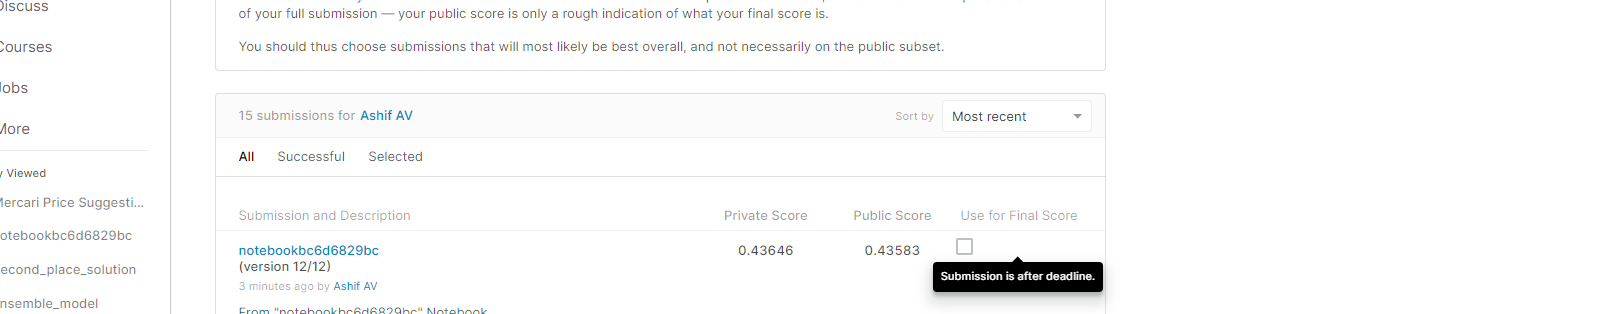

**LSTM**

1.Encode itemdescription and brandname using tokenizer for embedding layer.

2.Encode categorical features using labelencoder.

3.Apply embedding on all the features.

3.Apply LSTM on itemdescription and brand name embedding vectors.

4.Concatenate all the features and apply flatten and dense layers to produce the output.

In [ ]:
rnn_layer1 = ks.layers.LSTM(16, return_sequences = False) (emb_item_desc) #LSTM
rnn_layer2 = ks.layers.LSTM(8, return_sequences = False) (emb_name)

In [ ]:
main = ks.layers.concatenate([ks.layers.Flatten() (emb_main_category)
                            , ks.layers.Flatten() (emb_brand_name)
                            , ks.layers.Flatten() (emb_item_condition_shipping)
                            , rnn_layer1
                            , rnn_layer2
                            , numerical_dense_out
                            , ks.layers.Flatten() (emb_sub_category1)
                            , ks.layers.Flatten() (emb_sub_category2)
                            ],axis = 1)
main = ks.layers.Dropout(0.1) (ks.layers.Dense(128,activation="relu",kernel_initializer="he_normal",kernel_regularizer=ks.regularizers.l2(0.001)) (main))
main = ks.layers.Dropout(0.1) (ks.layers.Dense(64,activation="relu",kernel_initializer="he_normal",kernel_regularizer=ks.regularizers.l2(0.001)) (main))

In [ ]:
output = ks.layers.Dense(1, activation="linear") (main)

In [ ]:
model = ks.models.Model([main_category,brand_name,item_condition_shipping,item_desc,name,numerical_out,sub_category1,sub_category2], output)
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_category (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
brand_name (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_condition_shipping (InputL [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_desc (InputLayer)          [(None, 75)]         0                                            
_______________________________________________________________________________________

In [ ]:
y_train = np.log(dtrain.price+1)
y_valid = np.log(dvalid.price+1)

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [ ]:
model.fit(X_train,y_train,batch_size=20000,validation_data = (X_valid,y_valid),verbose = 1,epochs=10,callbacks=[model_checkpoint_callback])

Epoch 1/10
74/74 [==============================] - 276s 4s/step - loss: 0.2083 - mae: 0.3019 - val_loss: 0.2722 - val_mae: 0.3572
Epoch 2/10
74/74 [==============================] - 276s 4s/step - loss: 0.2029 - mae: 0.3001 - val_loss: 0.2684 - val_mae: 0.3568
Epoch 3/10
74/74 [==============================] - 274s 4s/step - loss: 0.1980 - mae: 0.2987 - val_loss: 0.2672 - val_mae: 0.3584
Epoch 4/10
74/74 [==============================] - 275s 4s/step - loss: 0.1939 - mae: 0.2978 - val_loss: 0.2636 - val_mae: 0.3574
Epoch 5/10
74/74 [==============================] - 271s 4s/step - loss: 0.1899 - mae: 0.2969 - val_loss: 0.2627 - val_mae: 0.3593
Epoch 6/10
74/74 [==============================] - 271s 4s/step - loss: 0.1856 - mae: 0.2949 - val_loss: 0.2586 - val_mae: 0.3576
Epoch 7/10
74/74 [==============================] - 273s 4s/step - loss: 0.1818 - mae: 0.2936 - val_loss: 0.2570 - val_mae: 0.3590
Epoch 8/10
74/74 [==============================] - 271s 4s/step - loss: 0.1784 - m

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
scores = model.predict(X_valid)
RMSLE = np.sqrt(mean_squared_error(y_valid, scores))

In [ ]:
RMSLE

0.4811954851703695

In [ ]:
scores = model.predict(X_test)
pred = ['price']
for i in scores:
  pred.append(np.exp(i))
index = ['test_id']
for i in range(3460725):
  index.append(i)
rows = zip(index,pred)
import csv
with open('submission.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for row in rows:
      wr.writerow(row)
from google.colab import files
files.download('submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Kaggle Score**

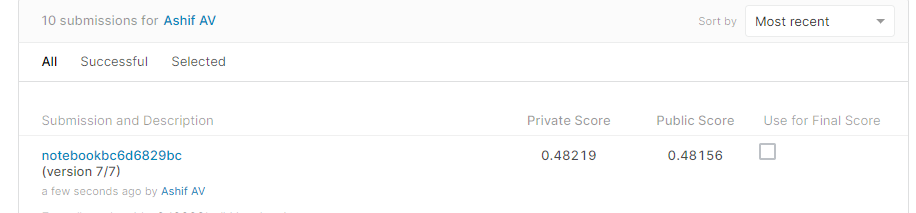

**CNN**

In [ ]:
id_cov1= ks.layers.Conv1D(128, 5, activation='relu')(emb_item_desc)
id_pool1 = ks.layers.MaxPooling1D(5)(id_cov1)
id_cov2 = ks.layers.Conv1D(128, 5, activation='relu')(id_pool1)
id_pool2 = ks.layers.MaxPooling1D(5)(id_cov2)
id_flat = ks.layers.Flatten()(id_pool2)
id_dense1 = ks.layers.Dense(128, activation='relu')(id_flat)

n_cov1= ks.layers.Conv1D(128, 5, activation='relu')(emb_name)
n_pool1 = ks.layers.MaxPooling1D(5)(n_cov1)
n_flat = ks.layers.Flatten()(n_pool1)
n_dense2 = ks.layers.Dense(128, activation='relu')(n_flat)

In [ ]:
main = ks.layers.concatenate([ks.layers.Flatten() (emb_main_category)
                            , ks.layers.Flatten() (emb_brand_name)
                            , ks.layers.Flatten() (emb_item_condition_shipping)
                            , id_dense1
                            , n_dense2
                            , numerical_dense_out
                            , ks.layers.Flatten() (emb_sub_category1)
                            , ks.layers.Flatten() (emb_sub_category2)
                            ],axis = 1)
main = ks.layers.Dropout(0.1) (ks.layers.Dense(128) (main))
main = ks.layers.Dropout(0.1) (ks.layers.Dense(64) (main))

In [ ]:
output = ks.layers.Dense(1, activation="linear") (main)

In [ ]:
model = ks.models.Model([main_category,brand_name,item_condition_shipping,item_desc,name,numerical_out,sub_category1,sub_category2], output)
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
item_desc (InputLayer)          [(None, 75)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 75, 50)       12954400    item_desc[0][0]                  
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 71, 128)      32128       embedding_1[0][0]                
__________________________________________________________________________________________________
name (InputLayer)               [(None, 10)]         0                                            
_______________________________________________________________________________________

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
y_train = np.log(dtrain.price+1)
y_valid = np.log(dvalid.price+1)
model.fit(X_train,y_train,batch_size=20000,validation_data = (X_valid,y_valid),verbose = 1,epochs=10,callbacks = [model_checkpoint_callback])

Epoch 1/10


In [ ]:
scores = model.predict(X_valid)
RMSLE = np.sqrt(mean_squared_error(y_valid, scores))
RMSLE

0.49589283164625036

In [ ]:
scores = model.predict(X_test)

In [ ]:
pred = np.exp(scores)

In [ ]:
index = []
for i in range(3460725):
  index.append(i)
rows = zip(index,pred)

In [ ]:
import csv
with open('CNN.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for row in rows:
      wr.writerow(row)

In [ ]:
from google.colab import files
files.download('CNN.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Kaggle Score**

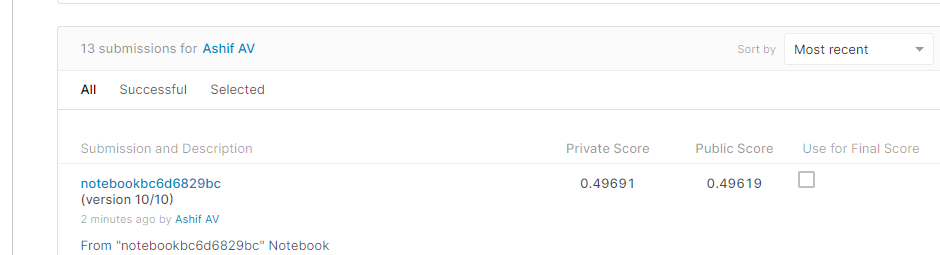

**LSTM + CNN**

In [ ]:
id_cov1= ks.layers.Conv1D(128, 5, activation='relu')(emb_item_desc)
id_pool1 = ks.layers.MaxPooling1D(5)(id_cov1)
id_cov2 = ks.layers.Conv1D(128, 5, activation='relu')(id_pool1)
id_pool2 = ks.layers.MaxPooling1D(5)(id_cov2)
rnn_layer1 = ks.layers.LSTM(16, return_sequences = False) (id_pool2)
id_flat = ks.layers.Flatten()(rnn_layer1)
id_dense1 = ks.layers.Dense(128, activation='relu')(id_flat)

n_cov1= ks.layers.Conv1D(128, 5, activation='relu')(emb_name)
n_pool1 = ks.layers.MaxPooling1D(5)(n_cov1)
rnn_layer2 = ks.layers.LSTM(8, return_sequences = False) (n_pool1)
n_flat = ks.layers.Flatten()(rnn_layer2)
n_dense2 = ks.layers.Dense(128, activation='relu')(n_flat)

In [ ]:
main = ks.layers.concatenate([ks.layers.Flatten() (emb_main_category)
                            , ks.layers.Flatten() (emb_brand_name)
                            , ks.layers.Flatten() (emb_item_condition_shipping)
                            , id_dense1
                            , n_dense2
                            , numerical_dense_out
                            , ks.layers.Flatten() (emb_sub_category1)
                            , ks.layers.Flatten() (emb_sub_category2)
                            ],axis = 1)
main = ks.layers.Dropout(0.1) (ks.layers.Dense(128) (main))
main = ks.layers.Dropout(0.1) (ks.layers.Dense(64) (main))

In [ ]:
output = ks.layers.Dense(1, activation="linear") (main)
model = ks.models.Model([main_category,brand_name,item_condition_shipping,item_desc,name,numerical_out,sub_category1,sub_category2], output)
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
y_train = np.log(dtrain.price+1)
y_valid = np.log(dvalid.price+1)
model.fit(X_train,y_train,batch_size=20000,validation_data = (X_valid,y_valid),verbose = 1,epochs=10,callbacks = [model_checkpoint_callback])

Epoch 1/10
74/74 [==============================] - 50s 671ms/step - loss: 1.9062 - mae: 0.8524 - val_loss: 0.5253 - val_mae: 0.4242
Epoch 2/10
74/74 [==============================] - 49s 656ms/step - loss: 0.6085 - mae: 0.4689 - val_loss: 0.4767 - val_mae: 0.3906
Epoch 3/10
74/74 [==============================] - 48s 653ms/step - loss: 0.5391 - mae: 0.4315 - val_loss: 0.4630 - val_mae: 0.3839
Epoch 4/10
74/74 [==============================] - 49s 659ms/step - loss: 0.5019 - mae: 0.4101 - val_loss: 0.4508 - val_mae: 0.3753
Epoch 5/10
74/74 [==============================] - 49s 664ms/step - loss: 0.4736 - mae: 0.3933 - val_loss: 0.4457 - val_mae: 0.3734
Epoch 6/10
74/74 [==============================] - 48s 653ms/step - loss: 0.4498 - mae: 0.3789 - val_loss: 0.4368 - val_mae: 0.3711
Epoch 7/10
74/74 [==============================] - 49s 661ms/step - loss: 0.4293 - mae: 0.3662 - val_loss: 0.4300 - val_mae: 0.3665
Epoch 8/10
74/74 [==============================] - 49s 656ms/step - 

In [ ]:
scores = model.predict(X_valid)
RMSLE = np.sqrt(mean_squared_error(y_valid, scores))
RMSLE

0.49020379021515825

In [ ]:
scores = model.predict(X_test)

In [ ]:
pred = np.exp(scores)

In [ ]:
index = []
for i in range(3460725):
  index.append(i)
rows = zip(index,pred)

In [ ]:
import csv
with open('LS_CNN.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for row in rows:
      wr.writerow(row)

In [ ]:
from google.colab import files
files.download('LS_CNN.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Kaggle Score**

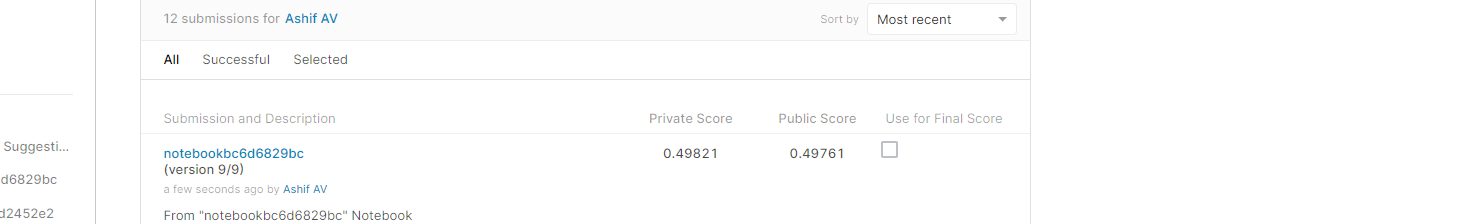

**Summary**

In [ ]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model", "Kaggle Score"]
x.add_row(["SGDRegressor", "0.51"])
x.add_row(["Decision Tree","0.57"])
x.add_row(["LSTM", "0.47"])
x.add_row(["CNN", "0.49"])
x.add_row(["LSTM+CNN", "0.49"])

print(x)


+---------------+--------------+
|     Model     | Kaggle Score |
+---------------+--------------+
|  SGDRegressor |     0.51     |
| Decision Tree |     0.57     |
|      LSTM     |     0.47     |
|      CNN      |     0.49     |
|    LSTM+CNN   |     0.49     |
+---------------+--------------+


The best model is LSTM which is having an RMSLE score of 0.47